In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Carga de Datos Iniciales

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Ingenierıa de Atributos (FeatureEngineering)

In [ ]:
# TotalYearsInSameJob - representa el total de años que un empleado ha pasado en el mismo trabajo.
data['TotalYearsInSameJob'] = data['TotalWorkingYears'] - (data['YearsAtCompany'] - data['YearsInCurrentRole'])

# IncomePerHour -  calcula el ingreso por hora de un empleado
data['IncomePerHour'] = data['MonthlyIncome'] / (80 * 4) # 80 era la columna 'StandardHours' que fue eliminada

# AgeWhenJoined - representa la edad que tenía el empleado cuando se unió a la compañía.
data['AgeWhenJoined'] = data['Age'] - data['YearsAtCompany']

# YearsUntilPromotion - indica los años que le quedan al empleado hasta su próxima promoción.
data['YearsUntilPromotion'] = data['YearsSinceLastPromotion'] if data['YearsSinceLastPromotion'].max() > 0 else data['YearsAtCompany']

# EmployeeEngagement - calcula un puntaje promedio de compromiso del empleado.
data['EmployeeEngagement'] = data[['JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction']].mean(axis=1)

#### Agno de incorporacion

In [ ]:
from datetime import datetime

# Obtener el año actual
current_year = datetime.now().year

# Calcular el año de incorporación
data['YearOfJoining'] = current_year - data['YearsAtCompany']
data['YearOfJoining'].unique()

array([2018, 2014, 2024, 2016, 2022, 2017, 2023, 2015, 2019, 2020, 1999,
       2021, 2012, 2010, 2002, 2009, 1997, 2003, 2007, 2013, 2011, 1987,
       2008, 2004, 1984, 2000, 1991, 2005, 1988, 2006, 1995, 1993, 1992,
       1990, 1998, 1994, 2001])

#### Rango de edades

In [ ]:
# Definir los rangos de edad y las etiquetas
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Crear una nueva columna en el DataFrame con los rangos de edad
data['Rango_Edad'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalYearsInSameJob,IncomePerHour,AgeWhenJoined,YearsUntilPromotion,EmployeeEngagement,YearOfJoining,Rango_Edad
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,4,0,5,6,18.728125,35,0,2.2,2018,36-45
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,7,1,7,7,16.031250,39,1,2.8,2014,46-55
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,7,6.531250,37,0,2.8,2024,36-45
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,7,3,0,7,9.090625,25,3,3.2,2016,26-35
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,2,6,10.837500,25,2,2.6,2022,26-35


#### Crear columna clasificar_empleado

In [ ]:
# Definir una función para clasificar el rendimiento de los empleados y aplicarlo al dataset 'data'.
def clasificar_empleado(row):
    if row['JobSatisfaction'] >= 4 and row['PerformanceRating'] >= 4:  # Alta satisfacción y alto rendimiento
        return 'Unicornios'
    elif row['JobSatisfaction'] >= 3 and row['PerformanceRating'] >= 3:  # Satisfacción y rendimiento medios
        return 'Desempeño Medio'
    else:  # Baja satisfacción o bajo rendimiento
        return 'Desempeño Bajo'

# Crear la columna 'Clasificacion'

data['Clasificacion'] = data.apply(clasificar_empleado, axis=1)
data.value_counts('Clasificacion')


Clasificacion
Desempeño Medio    822
Desempeño Bajo     569
Unicornios          79
Name: count, dtype: int64

#### Crear columna Semaforo

In [ ]:
# Definir una función para determinar el color del semáforo
def determinar_semaforo(row):
    if row['Attrition'] == 'Yes':
        return 'Rojo'
    elif row['JobSatisfaction'] <= 2:  # Ejemplo de condición para riesgo
        return 'Naranja'
    else:
        return 'Verde'

# Crear una nueva columna 'Semaforo' utilizando la función definida
data['Semaforo'] = data.apply(determinar_semaforo, axis=1)
data.value_counts('Semaforo')

Semaforo
Verde      776
Naranja    457
Rojo       237
Name: count, dtype: int64

#### Crear columna Overtime_Marital

In [ ]:
data['Overtime_Marital'] = data['OverTime'].astype(str)  + '_' + data['MaritalStatus'].astype(str)
data['Overtime_Marital'].unique()

array(['Yes_Single', 'No_Married', 'Yes_Married', 'No_Single',
       'No_Divorced', 'Yes_Divorced'], dtype=object)

In [ ]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

#### Crear columna Overtime_squared

In [ ]:
    #! OneHotEncoder para las nuevas columnas.
data['OverTime'] = data['OverTime'].replace(['Yes'],1)
data['OverTime'] = data['OverTime'].replace(['No'],0)


In [ ]:
data['Overtime_squared'] = data['OverTime']** 2
data.value_counts('Overtime_squared')

Overtime_squared
0    1054
1     416
Name: count, dtype: int64

#### Crear columna JobRole_BusinessTravel

In [ ]:
#Crear columna Cris
data['JobRole_BusinessTravel'] = data['JobRole'].astype(str)  + '_' + data['BusinessTravel'].astype(str)
data['JobRole_BusinessTravel'].unique()


array(['Sales Executive_Travel_Rarely',
       'Research Scientist_Travel_Frequently',
       'Laboratory Technician_Travel_Rarely',
       'Laboratory Technician_Travel_Frequently',
       'Manufacturing Director_Travel_Frequently',
       'Healthcare Representative_Travel_Rarely',
       'Research Scientist_Travel_Rarely',
       'Manufacturing Director_Travel_Rarely',
       'Laboratory Technician_Non-Travel', 'Manager_Travel_Rarely',
       'Manufacturing Director_Non-Travel',
       'Sales Representative_Travel_Rarely',
       'Research Director_Travel_Rarely',
       'Sales Executive_Travel_Frequently', 'Sales Executive_Non-Travel',
       'Healthcare Representative_Non-Travel',
       'Research Director_Travel_Frequently',
       'Human Resources_Travel_Rarely', 'Research Scientist_Non-Travel',
       'Healthcare Representative_Travel_Frequently',
       'Manager_Non-Travel', 'Manager_Travel_Frequently',
       'Sales Representative_Travel_Frequently',
       'Research Director_

## Preparación de los datos para el modelo

### Separación del 20% de datos (Muestra sin "Target" para probar el modelo con nuevos datos que nunca ha visto )

In [ ]:
from sklearn.model_selection import train_test_split


# Divide el DataFrame en dos partes: 80% para el modelo y 20% para archivo separado
model_data, separate_data = train_test_split(data, test_size=0.2, random_state=22)

# Exporta el 80% que usarás para el modelo
model_data.to_csv('/Users/rubenpecellin/Library/CloudStorage/GoogleDrive-rubenpecellin@gmail.com/Mi unidad/Data Science/Proyecto Final/HR-Employee-Attrition_model_data.csv', index=False)

# Eliminamos Attrition del 20%
separate_data = separate_data.drop(columns=['Attrition'])
# Exporta el 20% que no usarás para el modelo
separate_data.to_csv('/Users/rubenpecellin/Library/CloudStorage/GoogleDrive-rubenpecellin@gmail.com/Mi unidad/Data Science/Proyecto Final/HR-Employee-Attrition_separate_data.csv', index=False)

In [ ]:
data = pd.read_csv('HR-Employee-Attrition_model_data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,AgeWhenJoined,YearsUntilPromotion,EmployeeEngagement,YearOfJoining,Rango_Edad,Clasificacion,Semaforo,Overtime_Marital,Overtime_squared,JobRole_BusinessTravel
0,44,No,Travel_Rarely,1467,Research & Development,20,3,Life Sciences,1,1475,...,39,1,2.8,2019,36-45,Desempeño Bajo,Naranja,No_Single,0,Research Scientist_Travel_Rarely
1,34,No,Travel_Rarely,735,Sales,3,1,Medical,1,1915,...,30,0,3.0,2020,26-35,Desempeño Medio,Verde,Yes_Married,1,Sales Executive_Travel_Rarely
2,35,No,Travel_Rarely,776,Sales,1,4,Marketing,1,100,...,20,2,2.2,2009,36-45,Desempeño Bajo,Naranja,No_Single,0,Sales Executive_Travel_Rarely
3,50,Yes,Travel_Frequently,562,Sales,8,2,Technical Degree,1,723,...,46,1,2.4,2020,46-55,Desempeño Medio,Rojo,Yes_Married,1,Sales Executive_Travel_Frequently
4,26,No,Travel_Rarely,1349,Research & Development,23,3,Life Sciences,1,560,...,23,0,2.2,2021,26-35,Unicornios,Verde,No_Divorced,0,Research Scientist_Travel_Rarely


### Separar Categoricas de numericas

In [ ]:
# Seleccionar las columnas numericas
lista_num = data._get_numeric_data().columns
# Crear DF con las columnas numericas
data_num = data[lista_num]
# Crear DF con las columnas categoricas.
data_cat = data.drop(columns=data_num) #TODO COMENTADO? Creo que no hace nada.

### One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Identificar las columnas categóricas
categorical_columns = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus',"Attrition"
]
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

data_encoded = pd.concat([data_num, encoded_df], axis = 1)
data_encoded

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition_Yes
0,44,1467,20,3,1,1475,4,49,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34,735,3,1,1,1915,4,75,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,35,776,1,4,1,100,3,32,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,50,562,8,2,1,723,2,50,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,26,1349,23,3,1,560,1,90,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,42,1332,2,4,1,477,1,98,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1172,41,1018,1,3,1,1349,3,66,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1173,43,1082,27,3,1,1126,3,83,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1174,31,542,20,3,1,175,2,71,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# Renombrar las columnas
data_encoded = data_encoded.rename(columns={
    'Attrition_Yes': 'Attrition'
})

In [ ]:
data_final = data_encoded.copy()
data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,44,1467,20,3,1,1475,4,49,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34,735,3,1,1,1915,4,75,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,35,776,1,4,1,100,3,32,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,50,562,8,2,1,723,2,50,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,26,1349,23,3,1,560,1,90,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## EDA con Ingenieria de Características

### Correlaciones

In [ ]:
### Correlaciones - Realizar una selección de atributos más importantes
abs(data_final.corr()["Attrition"].sort_values(ascending=False).head(11))

Attrition                           1.000000
Overtime_squared                    0.246854
OverTime                            0.246854
MaritalStatus_Single                0.187842
JobRole_Sales Representative        0.173131
YearOfJoining                       0.144302
JobRole_Laboratory Technician       0.116447
BusinessTravel_Travel_Frequently    0.106759
DistanceFromHome                    0.084832
Department_Sales                    0.072756
EducationField_Technical Degree     0.052229
Name: Attrition, dtype: float64

### Graficar target con nuevas columnas:

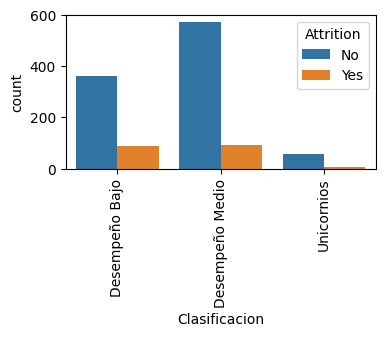

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='Clasificacion', hue='Attrition', data = data)
plt.xticks(rotation=90)
plt.show()

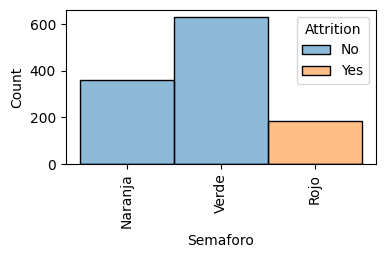

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.histplot(x='Semaforo', hue='Attrition', data = data)
plt.xticks(rotation=90)
plt.show()

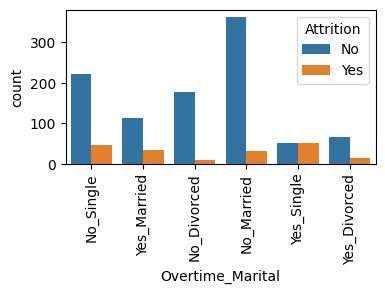

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='Overtime_Marital', hue='Attrition', data = data)
plt.xticks(rotation=90)
plt.show()

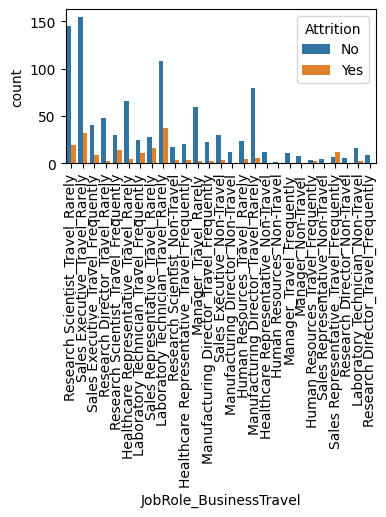

In [ ]:
plt.figure(figsize=(4, 2))
custom_palette = {'Yes': 'orange', 'No': '#BAABDA'}
sns.countplot(x='JobRole_BusinessTravel', hue='Attrition', data = data)
plt.xticks(rotation=90)
plt.show()

## Modelo de Machine Learning (RL)

In [ ]:
X = data_encoded.drop(columns=['Attrition'])
y = data_encoded['Attrition']


### Balancear Clases

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0.0    991
1.0    185
Name: count, dtype: int64

After Smoote Attrition
0.0    991
1.0    991
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

### Regresion logistica Hiperparametrizada

In [ ]:
#Escalamos primero
objeto_escalador = StandardScaler() # creo el objeto escalador, escalara el dataframe
objeto_escalador.fit(X_train) 

# ======================================

objeto_escalador.transform(X_train)

# ======================================

X_train[:] = objeto_escalador.transform(X_train)
X_test[:] = objeto_escalador.transform(X_test)
# sobreescrivo los valores
# X_train = ... esto sobreescrivira el objeto X_train
# el escalador se hace fit con train y se aplica a train y test

In [ ]:
clf = LogisticRegression() # class_weight='balanced'class_weight da mas peso a los 1.

# Definir los parámetros

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # Usamos solo 'l2' para simplificar
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'tol': [1e-4, 1e-5],
    'max_iter': [200, 300, 500]
}


# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [200, 300, 500], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [ ]:

# Obtener y mostrar los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
yhat = best_model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print(f'Precisión del mejor modelo de regresión logística: {accuracy}')

Mejores parámetros encontrados:
{'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}
Precisión del mejor modelo de regresión logística: 0.929471032745592


In [ ]:
accuracy = accuracy_score(y_test, yhat)
conf_matrix = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 92.95%
Confusion Matrix:
[[186   6]
 [ 22 183]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       192
         1.0       0.97      0.89      0.93       205

    accuracy                           0.93       397
   macro avg       0.93      0.93      0.93       397
weighted avg       0.93      0.93      0.93       397



![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
    #! Hay Overfitting?

# Ajustar el modelo en los datos de entrenamiento
best_model.fit(X_train, y_train)
# Predicciones en datos de entrenamiento
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
# Predicciones en datos de prueba
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.93
Test Accuracy: 0.93


### Guardar Modelo

In [ ]:
# import pickle
# # Guardar el OneHotEncoder en un archivo .pkl
# with open('encoder.pkl', 'wb') as file:
#     pickle.dump(encoder, file)

# print("OneHotEncoder guardado en encoder.pkl")

In [ ]:
import pickle
# Guardar el modelo (RL) en un archivo .pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Modelo guardado en model.pkl")

Modelo guardado en model.pkl


## Anadir Predicciones y Probabilidades al DataFrame Original.

In [ ]:
yhat_colum = best_model.predict(objeto_escalador.transform(X))
yhat_colum

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
proba_colum = best_model.predict_proba(objeto_escalador.transform(X))[:,1]
proba_colum_porcentajes = proba_colum * 100
proba_colum_porcentajes_formateados = proba_colum_porcentajes.round(2)
proba_colum

array([0.07247836, 0.18605419, 0.15769515, ..., 0.18451778, 0.64301353,
       0.08656605])

In [ ]:
data['Prediccion'] = yhat_colum
data['Probabilidad'] = proba_colum_porcentajes_formateados

# Crear Nueva Columna de Semaforo Real con las Predicciones.

In [ ]:
# Definir una función para clasificar la probabilidad
def clasificar_probabilidad(prob):
    if prob < 30.00:
        return 'Verde'
    elif 30.00 <= prob <= 70.00:
        return 'Naranja'
    else:
        return 'Rojo'

# Aplicar la función Semaforo a la columna 'Probabilidades'
data['semaforo_proba'] = data['Probabilidad'].apply(clasificar_probabilidad)


In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearOfJoining,Rango_Edad,Clasificacion,Semaforo,Overtime_Marital,Overtime_squared,JobRole_BusinessTravel,Prediccion,Probabilidad,semaforo_proba
0,44,No,Travel_Rarely,1467,Research & Development,20,3,Life Sciences,1,1475,...,2019,36-45,Desempeño Bajo,Naranja,No_Single,0,Research Scientist_Travel_Rarely,0.0,7.25,Verde
1,34,No,Travel_Rarely,735,Sales,3,1,Medical,1,1915,...,2020,26-35,Desempeño Medio,Verde,Yes_Married,1,Sales Executive_Travel_Rarely,0.0,18.61,Verde
2,35,No,Travel_Rarely,776,Sales,1,4,Marketing,1,100,...,2009,36-45,Desempeño Bajo,Naranja,No_Single,0,Sales Executive_Travel_Rarely,0.0,15.77,Verde
3,50,Yes,Travel_Frequently,562,Sales,8,2,Technical Degree,1,723,...,2020,46-55,Desempeño Medio,Rojo,Yes_Married,1,Sales Executive_Travel_Frequently,1.0,57.47,Naranja
4,26,No,Travel_Rarely,1349,Research & Development,23,3,Life Sciences,1,560,...,2021,26-35,Unicornios,Verde,No_Divorced,0,Research Scientist_Travel_Rarely,0.0,3.09,Verde


### Exportar DF to CSV para importar a Tableau

In [ ]:
data.to_csv('mi_data_prob&preditv2.csv', index=False)


# Conclusiones
- El 63% de los empleados que abandona son hombres.
- El rango de edad de abandono es 26-35, siendo 33 la edad media.
- Los departamentos I+D y Ventas son los que mas tasa de abandono tienen. 26% y 24% respectivamente.
- El rol que mas abandona es Ejecutivo de Ventas, proporcional a la magnitud del departamento
- Los empleados que hacen horas extras (53%) y viajan frecuentemente (66%) tienen mas tasa de abandono. 
- Los empleados Juniors (30%) de los que se van, lo hacen el primer año.

# Nuevos Datos

## Cargar el modelo ML guardado

In [ ]:
# Cargar el modelo desde el archivo .pkl
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# # Cargar el OneHotEncoder que se usó para entrenar el modelo
# with open('encoder.pkl', 'rb') as file:
#     encoder = pickle.load(file)

## OneHotEncoder

In [ ]:
new_data = pd.read_csv('HR-Employee-Attrition_separate_data.csv') #Todo falta quitar ATTRITION del csv

In [ ]:
new_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,AgeWhenJoined,YearsUntilPromotion,EmployeeEngagement,YearOfJoining,Rango_Edad,Clasificacion,Semaforo,Overtime_Marital,Overtime_squared,JobRole_BusinessTravel
0,53,Travel_Rarely,661,Sales,7,2,Marketing,1,862,1,...,48,0,2.8,2019,46-55,Desempeño Medio,Verde,Yes_Married,1,Sales Executive_Travel_Rarely
1,31,Travel_Frequently,523,Research & Development,2,3,Life Sciences,1,1464,2,...,29,2,2.6,2022,26-35,Desempeño Medio,Rojo,Yes_Married,1,Laboratory Technician_Travel_Frequently
2,29,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,...,26,0,3.6,2021,26-35,Desempeño Medio,Verde,No_Divorced,0,Sales Executive_Travel_Rarely
3,43,Travel_Rarely,531,Sales,4,4,Marketing,1,1293,4,...,22,15,3.6,2003,36-45,Desempeño Medio,Verde,No_Single,0,Sales Executive_Travel_Rarely
4,26,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,1,...,25,0,2.0,2023,26-35,Desempeño Medio,Rojo,No_Single,0,Laboratory Technician_Travel_Rarely


In [ ]:
# Seleccionar las columnas numericas
lista_num2 = new_data._get_numeric_data().columns
# Crear DF con las columnas numericas
data_num2 = new_data[lista_num2]
# Crear DF con las columnas categoricas.
data_cat = new_data.drop(columns=data_num2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Identificar las columnas categóricas
categorical_columns = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus'
]
encoder2 = OneHotEncoder(drop='first', sparse_output=False)
encoded_data2 = encoder2.fit_transform(new_data[categorical_columns])

encoded_df2 = pd.DataFrame(encoded_data2, columns=encoder2.get_feature_names_out(categorical_columns))

data_encoded2 = pd.concat([data_num2, encoded_df2], axis = 1)
data_encoded2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,53,661,7,2,1,862,1,78,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,31,523,2,3,1,1464,2,94,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29,1247,20,2,1,349,4,45,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,43,531,4,4,1,1293,4,56,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,26,1357,25,3,1,55,1,48,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,29,352,6,1,1,1865,4,87,2,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
290,26,192,1,2,1,1083,1,59,2,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
291,46,168,4,2,1,1280,4,33,2,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
292,24,1127,18,1,1,150,2,52,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Ejecurtar el Modelo

In [ ]:
# Realizar predicciones con el modelo cargado
predictions = loaded_model.predict(data_encoded2)

## Obtener Predicciones y Probabilidades

In [ ]:
yhat_colum = best_model.predict(objeto_escalador.transform(data_encoded2))
yhat_colum

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
proba_colum = best_model.predict_proba(objeto_escalador.transform(data_encoded2))[:,1]
proba_colum_porcentajes = proba_colum * 100
proba_colum_porcentajes_formateados = proba_colum_porcentajes.round(2)
proba_colum

array([2.09792131e-01, 7.77791731e-01, 2.85422788e-02, 5.96433828e-02,
       7.57098457e-01, 6.24427493e-03, 1.12914379e-01, 2.58745905e-01,
       8.03806866e-03, 7.01414826e-01, 4.00555554e-02, 5.62866898e-03,
       1.97146819e-01, 1.60509698e-02, 1.29088470e-01, 2.09097522e-01,
       6.59914101e-03, 2.24008374e-01, 7.59823776e-01, 2.04421838e-01,
       4.04938246e-01, 1.50511139e-03, 2.48500884e-01, 8.25954355e-03,
       4.54943757e-01, 1.18860573e-01, 7.13991282e-02, 6.83110083e-02,
       1.01018451e-01, 6.04688322e-01, 4.81225388e-01, 1.05363038e-02,
       1.66001220e-02, 5.53466834e-02, 5.65443940e-01, 3.65871544e-02,
       5.79804506e-03, 5.97432530e-01, 1.95572659e-03, 6.49224904e-03,
       1.65672832e-02, 7.66318754e-01, 3.44071404e-01, 5.93048166e-02,
       8.58637626e-01, 1.27834263e-02, 3.38578040e-01, 1.76556317e-01,
       5.00252107e-01, 5.70512273e-02, 8.53186126e-02, 4.57665551e-05,
       3.87093402e-01, 3.25666925e-02, 5.37261585e-02, 3.41290534e-01,
      

## Añadir Predict y Proba al Nuevo Dataset

In [ ]:
new_data['Prediccion'] = yhat_colum
new_data['Probabilidad'] = proba_colum_porcentajes_formateados

## Añadir columna Semaforo (Probabilidades)

In [ ]:
# Aplicar la función Semaforo a la columna 'Probabilidades'
new_data['semaforo_proba'] = new_data['Probabilidad'].apply(clasificar_probabilidad)

## Exportar DF to CSV para importar a Tableau

In [ ]:
new_data.to_csv('mi_data_prob&preditv_NewModel.csv', index=False)
